In [1]:
#importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import seaborn as sns


In [2]:
df=pd.read_csv('/home/chirag/Credit Risk Analysis and Deafult prediction/Data/processed_loan.csv')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,pymnt_plan,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,-0.822910,-0.815781,-0.747225,-0.570835,-0.347364,-0.764949,1.469212,-0.697282,0,0,...,False,False,False,False,False,False,False,False,False,False
1,-1.163122,-1.168379,-1.099657,1.751820,0.904234,-1.258822,-1.136557,-0.603850,1,0,...,False,False,False,False,False,False,False,False,False,False
2,-1.176731,-1.182483,-1.113896,-0.570835,1.091161,-1.141393,1.469212,-0.880222,0,0,...,False,False,False,False,False,False,False,False,False,False
3,-0.142484,-0.110583,-0.031681,-0.570835,0.422017,0.080732,1.469212,-0.304868,0,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.822910,-0.815781,-0.743665,-0.570835,-1.092363,-0.795672,-0.557497,-0.510418,0,0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
x=df.drop(columns=['loan_status'])
y=df['loan_status']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [5]:
#defining models to use 
models={
    "Logistic Regrssion": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100,random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100,random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier(),
    "Support Vector Machine": SVC(probability=True)

}

In [6]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-----------------------------------------------")

In [7]:
for name, model in models.items():
    evaluate_model(model, x_train, x_test, y_train, y_test)

print("Model training and evaluation complete. Compare results and select the best model!")



Model: LogisticRegression
Accuracy: 0.9938
ROC-AUC Score: 0.9787
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6591
           1       1.00      0.96      0.98      1125

    accuracy                           0.99      7716
   macro avg       1.00      0.98      0.99      7716
weighted avg       0.99      0.99      0.99      7716

Confusion Matrix:
[[6591    0]
 [  48 1077]]
-----------------------------------------------

Model: RandomForestClassifier
Accuracy: 0.9948
ROC-AUC Score: 0.9822
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6591
           1       1.00      0.96      0.98      1125

    accuracy                           0.99      7716
   macro avg       1.00      0.98      0.99      7716
weighted avg       0.99      0.99      0.99      7716

Confusion Matrix:
[[6591    0]
 [  40 1085]]
--------------------------

/home/chirag/deep_learning_env/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:39:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBClassifier
Accuracy: 0.9984
ROC-AUC Score: 0.9947
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6591
           1       1.00      0.99      0.99      1125

    accuracy                           1.00      7716
   macro avg       1.00      0.99      1.00      7716
weighted avg       1.00      1.00      1.00      7716

Confusion Matrix:
[[6591    0]
 [  12 1113]]
-----------------------------------------------

Model: CatBoostClassifier
Accuracy: 0.9977
ROC-AUC Score: 0.9920
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6591
           1       1.00      0.98      0.99      1125

    accuracy                           1.00      7716
   macro avg       1.00      0.99      1.00      7716
weighted avg       1.00      1.00      1.00      7716

Confusion Matrix:
[[6591    0]
 [  18 1107]]
-----------------------------------

As we can see the LightGBM give the best result so we try to tune its hyperparameter to btter the results

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

In [10]:
#we use RandomSearchCV to get roug idea of ggod values 
param_dist = {
    'num_leaves': np.arange(20, 200, 20),
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10, -1],  # -1 means no limit
    'min_child_samples': [10, 20, 50, 100],#Minimum samples required for a leaf
    'subsample': [0.6, 0.8, 1.0],#fraction of data used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],
    'lambda_l1': [0, 0.1, 0.5, 1],
    'lambda_l2': [0, 0.1, 0.5, 1]
}


In [12]:
lgbm = LGBMClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,  # Tries 30 different combinations
    scoring='roc_auc',  # Optimizing for ROC-AUC
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

random_search.fit(x_train, y_train)

print("Best parameters from Randomized Search:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] l

In [14]:
#now we refine the Randomized search using grid search
best_params = random_search.best_params_

param_grid = {
    'num_leaves': [best_params['num_leaves'] - 10, best_params['num_leaves'], best_params['num_leaves'] + 10],
    'learning_rate': [best_params['learning_rate'] / 2, best_params['learning_rate'], best_params['learning_rate'] * 2],
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth'] - 2, best_params['max_depth'], best_params['max_depth'] + 2],
}

grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3601, number of negative: 21087
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4674
[LightGBM] [Info] Number of data points in the train set: 24688, number of used features: 124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145860 -> initscore=-1.767445
[LightGBM] [Info] Start training from score -1.767445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, rep

In [15]:
#training the model based on the best parameters
best_lgbm = LGBMClassifier(**grid_search.best_params_, random_state=42)
best_lgbm.fit(x_train, y_train)

y_pred = best_lgbm.predict(x_test)
y_pred_prob = best_lgbm.predict_proba(x_test)[:, 1]

roc_score = roc_auc_score(y_test, y_pred_prob)
print("Final Optimized LightGBM ROC-AUC Score:", roc_score)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4502, number of negative: 26359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4683
[LightGBM] [Info] Number of data points in the train set: 30861, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145880 -> initscore=-1.767288
[LightGBM] [Info] Start training from score -1.767288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Final Optimized LightGBM ROC-AUC Score: 0.9986812994150273


# Model performance

In [16]:
# Generate predictions
y_pred = best_lgbm.predict(x_test)
y_pred_prob = best_lgbm.predict_proba(x_test)[:, 1]


In [17]:
# Generate predictions
y_pred = best_lgbm.predict(x_test)
y_pred_prob = best_lgbm.predict_proba(x_test)[:, 1]


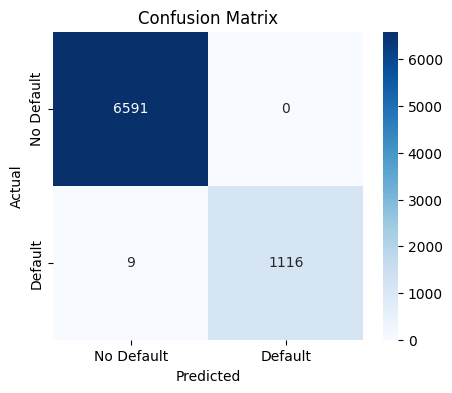

In [18]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6591
           1       1.00      0.99      1.00      1125

    accuracy                           1.00      7716
   macro avg       1.00      1.00      1.00      7716
weighted avg       1.00      1.00      1.00      7716



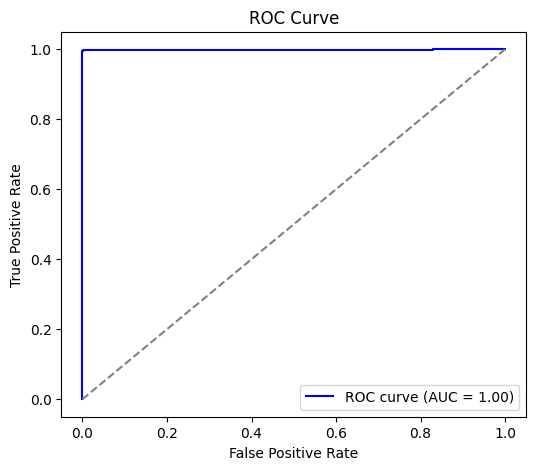

Final AUC Score: 0.9987


In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"Final AUC Score: {roc_auc:.4f}")


/tmp/ipykernel_11959/761241273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')


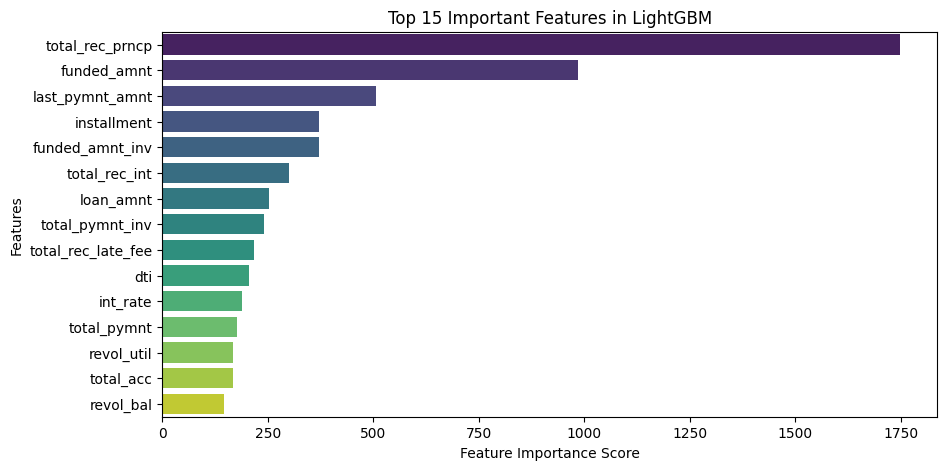

In [21]:
importances = best_lgbm.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Important Features in LightGBM")
plt.show()


In [22]:
import joblib

model_path = "/home/chirag/Credit Risk Analysis and Deafult prediction/models/lgbm_credit_risk.pkl"

joblib.dump(best_lgbm, model_path)
print(f"Model saved at: {model_path}")


Model saved at: /home/chirag/Credit Risk Analysis and Deafult prediction/models/lgbm_credit_risk.pkl


In [1]:
import pandas as pd

# Load your processed training data before training
df_train = pd.read_csv("/home/chirag/Loan_approval_predictor/Data/processed_loan.csv")

print("Number of features in training data:", df_train.shape[1] - 1)  # -1 to exclude the target column


Number of features in training data: 143
